Numpy:
- Forms the basis for everything else
- Central object: Numpy array
- Isn't like a regular Java array
- More like a vector/matrix
- Can do addition, subtraction, multiplication, etc.
- Most importantly, they are optimized for speed
- We will do a demo to compare array speed vs. Python for loop with list
- Built-in matrix opertaions: product, inverse, determinant, linear

Will also dig into pandas. It's a ot like R. We'll go through filtering by row/col, apply, join, etc.

Matplotlib:
- We know how to load data, now let's look at it
- Line chart, scatter plot, histogram
- Images
- 99% of the time, you'll be doing one of the above

Scipy:
- Like an add-on to numpy
- Numpy provides building blocks for general things, Scipy can do specific things
- PDF, CDF, sampling, statistical testing,
- Convolution, fourier
- We'll focus on statistical aspects the most

How to succeed:
- Code along, make sure you can write all the code yourself
- Do it over and over until it gets imprinted in your memory
- People think they can learn from just watching a video. Don't be one of these people

Practice:
- This course is all about giving you simple tools which are applied in deep learning and data science
- the best practice is actually taking a deep learning and data science course to apply these tools
- There will be a few toy problems in this course
- But the best practice is real applications

Course code is available at https://www.github.com/lazyprogrammer/machine_learning_examples in the numpy_class folder

In [1]:
import numpy as np
import scipy
import matplotlib as plt
import pandas

In [2]:
L = [1,2,3]
A = np.array([1,2,3])

In [3]:
for e in L:
    print(e)

1
2
3


In [4]:
for e in A:
    print(e)

1
2
3


In [5]:
L.append(4)
L

[1, 2, 3, 4]

In [6]:
A.append(4)
#can't do

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [7]:
L = L + [5]
L

[1, 2, 3, 4, 5]

In [8]:
L2 = []
for e in L:
    print(e)
    L2.append(e + e)
    
L2

1
2
3
4
5


[2, 4, 6, 8, 10]

In [9]:
# Numpy array does elementwise addition!
A + A

array([2, 4, 6])

In [10]:
2*A # also elementwise

array([2, 4, 6])

In [11]:
2*L # adds two of the lists together

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [12]:
L**2 # Can't square a list directly

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [13]:
L2 = []
for e in L:
    L2.append(e*e)
    
L2

[1, 4, 9, 16, 25]

In [14]:
A**2 # Can directly square each element of the numpy array

array([1, 4, 9])

In [15]:
np.sqrt(A)

array([ 1.        ,  1.41421356,  1.73205081])

In [16]:
np.log(A)

array([ 0.        ,  0.69314718,  1.09861229])

In [17]:
np.exp(A) # all of these go elementwise! cool. Would otherwise require a for loop

array([  2.71828183,   7.3890561 ,  20.08553692])

## For loop vs. cosine method
- Can either do a1b1 + a2b2 or |a||b|cos(theta)

In [18]:
a = np.array([1,2])
b = np.array([2,1])

In [19]:
# Using the direct definition of the dot product
dot = 0

for e, f in zip(a, b):
    dot += e*f

dot

4

In [20]:
a*b # Does it elementwise

array([2, 2])

In [21]:
np.sum(a*b) # this is the dot product!

4

In [22]:
(a*b).sum() # same answer

4

In [23]:
np.dot(a, b)

4

In [24]:
a.dot(b)

4

In [25]:
b.dot(a)

4

In [26]:
# Now let's use the alternative method, using the angle between the vectors
amag = np.sqrt((a*a).sum())
amag

2.2360679774997898

In [27]:
# this is a common operation so it's also built in
amag = np.linalg.norm(a)
amag

2.2360679774997898

In [28]:
cosangle = a.dot(b) / ( np.linalg.norm(a) * np.linalg.norm(b) )
cosangle

0.79999999999999982

In [29]:
angle = np.arccos(cosangle)
angle # radians by default

0.6435011087932847

# Dot product 2: speed comparison
- Will compare 2 ways of calculating the dot product and see which takes longer to run, by looping vs. numpy built in function

In [30]:
# Version from class
from datetime import datetime

a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

def slow_dot_product(a, b):
    result = 0
    for e, f in zip(a,b):
        result += e*f
    return result

t0 = datetime.now()
for t in range(T):
    slow_dot_product(a, b)
dt1 = datetime.now() - t0

t0 = datetime.now()
for t in range(T):
    a.dot(b)
dt2 = datetime.now() - t0

print("dt1 / dt2:", dt1.total_seconds() / dt2.total_seconds())

dt1 / dt2: 34.95103470154717


In [31]:
# My version
# Make them loop for ages to see the time difference

# Make two arrays
a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

for t in range(T):
    # looping method
    res1 = 0
    for e, f in zip(a,b):
        res1 += e*f
    
t1 = datetime.now() - t0

t0 = datetime.now()
for t in range(T):
    # numpy dot
    res2 = a.dot(b)

t2 = datetime.now() - t0

print("time for looping method is", t1.total_seconds()/t2.total_seconds(), "times slower than np.dot()")

time for looping method is 232.08316188160478 times slower than np.dot()


# Vecotrs and Matrices

In [32]:
# A matrix: 2d array, or a list of lists
# Can use a list of lists to initialize a matrix

M = np.array([ [1,2], [3,4] ]) # First index is row, second index is column
L = [ [1,2], [3,4] ]

In [33]:
L[0]

[1, 2]

In [34]:
L[0][0]

1

In [35]:
M[0][0]

1

In [36]:
M[0,0]

1

In [37]:
M2 = np.matrix([ [1,2], [3,4]])
M2 # Official documentation recommends against using a matrix lol

matrix([[1, 2],
        [3, 4]])

In [38]:
# Convert to an array if you see a matrix
A = np.array(M2)
A

array([[1, 2],
       [3, 4]])

In [39]:
A.T
# When in doubt, there's either 1D arrays or 2D arrays

array([[1, 3],
       [2, 4]])

# Generating matrices to work with

In [40]:
# Sometimes we just need some arrays to try stuff on
np.array([1, 2, 3]) # this is pretty inconvenient for bigger arrays

array([1, 2, 3])

In [41]:
Z = np.zeros(10)
Z

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [42]:
Z = np.zeros((10, 10)) # Takes in a tuple with the dimensions
Z

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [43]:
O = np.ones((10, 10))
O

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [44]:
R = np.random.random((10, 10))
R

array([[ 0.69849547,  0.05024338,  0.1522008 ,  0.67240747,  0.01341694,
         0.61200605,  0.9882204 ,  0.61060446,  0.15817073,  0.83455259],
       [ 0.55666297,  0.34685731,  0.09443277,  0.73248004,  0.7295583 ,
         0.37467377,  0.25803984,  0.55139979,  0.66008277,  0.82752719],
       [ 0.37239326,  0.11395491,  0.69292106,  0.46143013,  0.88127153,
         0.01029811,  0.58292232,  0.72337874,  0.56852664,  0.84024325],
       [ 0.10274168,  0.55393511,  0.96357952,  0.29473251,  0.93927032,
         0.8238492 ,  0.34299574,  0.76304052,  0.80058436,  0.24063446],
       [ 0.87781133,  0.40224831,  0.92838802,  0.44168034,  0.16712258,
         0.3426943 ,  0.00322434,  0.88925571,  0.31832041,  0.51623036],
       [ 0.74880184,  0.49807647,  0.03920255,  0.44105993,  0.07476558,
         0.33260461,  0.87575637,  0.69288969,  0.4948172 ,  0.45828787],
       [ 0.11804884,  0.87870263,  0.30772016,  0.31096682,  0.15569174,
         0.84687268,  0.60235003,  0.80635456

In [46]:
# We are interested in the probability distributino that the random numbers came fro
# Above is from uniformly distributed between 0 and 1
# randn gives gaussian distribution, mean 0 and variance 1
G = np.random.randn(10, 10)
G

array([[-1.15918799,  1.36628731, -1.36089746, -0.89494688,  0.56625105,
        -0.70684731, -0.2706899 ,  0.3405251 , -0.29805554,  0.0480877 ],
       [-0.75844794, -0.9091485 ,  0.66066996,  0.79410856,  0.98457384,
         0.58002674,  1.29952559,  0.29821821, -0.6060454 , -0.71885994],
       [-0.3854224 ,  1.27216888,  0.53035646,  0.18194896, -1.61953416,
         0.88376179,  1.12041664, -0.75686582,  0.52602332, -0.19777073],
       [-2.67116501, -1.8522234 , -1.17615584,  0.70588826,  0.36358472,
         1.19654635,  0.04249739,  0.04992018, -0.50834001,  0.24230045],
       [-0.3762642 , -0.6123169 , -1.43685685,  0.08425066,  0.76783275,
         0.89409267,  0.08226612, -0.76952829,  1.14624833, -1.00238085],
       [ 0.55136926, -0.72015613, -0.97969195,  0.2154675 ,  0.43899441,
         0.80150275, -0.66431808, -0.33942695, -0.074842  , -1.22197161],
       [-0.4577572 , -2.2719433 ,  0.20300107, -1.75964065,  0.1980042 ,
         1.47426015, -0.36289355,  0.09915716

In [47]:
G.mean()

0.0079024348365207657

In [48]:
G.var()

1.1061426090794904

# Matrix Products
- Matrix multiplication
- Requirement: inner dimensions must match
- If we have A of size (2,3) and Bn of size (3,3)
- We can multiplpe AB (inner dimension is 3)
- We cannot multiply BA (inner dimension is 3/2)

- C(i,j) is the dot product of row A(i, :) and column B(:, j)
- in Numpy: C = A.dot(B)

- It's very natural to want to do element-wise multiplication, but remember it's dot

# More matrix operations

In [49]:
# Matrix inverse
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [50]:
Ainv = np.linalg.inv(A)
Ainv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [51]:
Ainv.dot(A)
A.dot(Ainv)

array([[  1.00000000e+00,   1.11022302e-16],
       [  0.00000000e+00,   1.00000000e+00]])

In [52]:
# Matrix determinant
np.linalg.det(A)

-2.0000000000000004

In [53]:
np.diag(A) # diagonal elements

array([1, 4])

In [54]:
np.diag([1,2]) # diagonalize a 1d array

array([[1, 0],
       [0, 2]])

In [55]:
# Dot product = inner product
a = np.array([1,2])
b = np.array([3,4])

In [56]:
np.outer(a, b) # Useful in covariance

array([[3, 4],
       [6, 8]])

In [57]:
np.inner(a, b)

11

In [58]:
a.dot(b)

11

In [59]:
# Matrix trace
np.diag(A).sum()

5

In [60]:
np.trace(A)

5

In [61]:
# Eigenvalues and eigenvectors
# often want to compute these for the covariance of a dataset
X = np.random.randn(100,3) # 100 samples, 3 features
cov = np.cov(X)
cov.shape # should be 3x3

(100, 100)

In [62]:
cov = np.cov(X.T) # remmeber when you want to calculate the covariance of a data matrix, transpose first
cov.shape

(3, 3)

In [63]:
np.linalg.eigh(cov)

(array([ 0.87544752,  1.11873672,  1.57759432]),
 array([[ 0.88139953,  0.2236946 , -0.41604759],
        [-0.2711136 ,  0.9608128 , -0.05775965],
        [ 0.38682333,  0.16370548,  0.9075066 ]]))

In [64]:
np.linalg.eig(cov)

(array([ 1.57759432,  0.87544752,  1.11873672]),
 array([[ 0.41604759,  0.88139953,  0.2236946 ],
        [ 0.05775965, -0.2711136 ,  0.9608128 ],
        [-0.9075066 ,  0.38682333,  0.16370548]]))

# Solving linear systems

- Is a system of D equations and D unknowns
- A is DxD, assume it is invertible
- We have all the tools we need t solve this already:
    - Matrix inverse
    - Matrix multiply (dot)

In [65]:
A

array([[1, 2],
       [3, 4]])

In [66]:
b = np.array([1,2])

In [67]:
x = np.linalg.inv(A).dot(b)
x

array([  2.22044605e-16,   5.00000000e-01])

In [68]:
x = np.linalg.solve(A, b) # always use solve(), never use the inverse method
x

array([ 0. ,  0.5])

# Word Problem
The admission fee at a small fair is $1.50 for children and $4.00 for adults. On a certain day, 2200 people enter the fair and $5050 is collected. How many childrena dn how many adults attended?

X1 = number of children
X2 = number of adults
X1 + X2 = 2200
1.5X1 + 4X2 = 5050

This is a linear equation!

In [69]:
A = np.array([[1,1], [1.5,4]])
b = np.array([2200, 5050])
np.linalg.solve(A, b)

array([ 1500.,   700.])

# Manual Data Loading
Loading in Data
- Unstructured data - the internet
- Semi-structured data - Apache logs
- Structured data - Kaggle and other datasetse (usually CSV)
- CSV = comma separated values
- Each row is a record
- Each record's values are separated by commas
- It's a table, so you can open in Excel
- But data scientists like matrices, so we'll turn it into a matrix of numbers (manually first)
- File: data_2d.csv Folder: linear_regression_class

In [70]:
file = "./data/data_2d.csv"
X = []

for line in open(file):
    row = line.split(',')
    sample = [float(i) for i in row]
    X.append(sample)
    
X = np.array(X)
X.shape

(100, 3)

# Dataframes
- Look at Pandas
- A lot like R
- Most times: Load in data and immediately convert it into Numpy array
- Most features you won't use often, you'll just forget them

In [71]:
import pandas as pd
X = pd.read_csv(file, header=None)

In [72]:
type(X)

pandas.core.frame.DataFrame

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [74]:
X.head(10)

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486
5,3.192702,29.256299,94.618811
6,49.200784,86.144439,356.348093
7,21.882804,46.841505,181.653769
8,79.509863,87.397356,423.557743
9,88.153887,65.205642,369.229245


In [75]:
M = X.as_matrix()
type(M)

numpy.ndarray

In [76]:
X[0] # Numpy X[0] gives first row, pandas it gives us the column!
type(X[0])

pandas.core.series.Series

In [82]:
X.iloc[0]

0     17.930201
1     94.520592
2    320.259530
Name: 0, dtype: float64

In [83]:
X.ix[0]

0     17.930201
1     94.520592
2    320.259530
Name: 0, dtype: float64

In [84]:
type(X.ix[0])

pandas.core.series.Series

In [85]:
X[[0,2]].head()

,0,2
0,17.930201,320.259530
1,97.144697,404.634472
2,81.775901,181.485108
3,55.854342,321.773638
4,49.366550,322.465486


In [86]:
X[ X[0] < 5]

,0,1,2
5,3.192702,29.256299,94.618811
44,3.593966,96.252217,293.237183
54,4.593463,46.335932,145.818745
90,1.382983,84.944087,252.905653
99,4.142669,52.254726,168.034401


In [87]:
type(X[0] < 5) # can pass a boolean series or column header! into df square brackets

pandas.core.series.Series

In [88]:
# Cleaning up data
file_airline = "./data/international-airline-passengers.csv"
df = pd.read_csv(file_airline, engine="python", skipfooter=3)

In [89]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [90]:
df.columns = ["month", "passengers"]

In [91]:
df['passengers'].head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

In [92]:
df.passengers.head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

In [93]:
df['ones'] = 1

In [94]:
df.head()

,month,passengers,ones
0,1949-01,112,1
1,1949-02,118,1
2,1949-03,132,1
3,1949-04,129,1
4,1949-05,121,1


### Dataframes: column naming
- What if we want to model an interactino effect between X1 and X2 -> X1*X2
- We use the apply function!

In [95]:
# convert to datetime objects
from datetime import datetime
datetime.strptime("1949-03", "%Y-%m")

datetime.datetime(1949, 3, 1, 0, 0)

In [96]:
df['dt'] = df.apply(lambda row: datetime.strptime(row['month'], "%Y-%m"), axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
month         144 non-null object
passengers    144 non-null int64
ones          144 non-null int64
dt            144 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ KB


### Joins

In [98]:
t1_path = "./data/table1.csv"
t2_path = "./data/table2.csv"
t1 = pd.read_csv(t1_path)
t2 = pd.read_csv(t2_path)

In [99]:
t1

,user_id,email,age
0,1,alice@gmail.com,20
1,2,bob@gmail.com,25
2,3,carol@gmail.com,30


In [100]:
t2

,user_id,ad_id,click
0,1,1,1
1,1,2,0
2,1,5,0
3,2,3,0
4,2,4,1
5,2,1,0
6,3,2,0
7,3,1,0
8,3,3,0
9,3,4,0


In [101]:
m = pd.merge(t1, t2, on='user_id')
m

,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
1,1,alice@gmail.com,20,2,0
2,1,alice@gmail.com,20,5,0
3,2,bob@gmail.com,25,3,0
4,2,bob@gmail.com,25,4,1
5,2,bob@gmail.com,25,1,0
6,3,carol@gmail.com,30,2,0
7,3,carol@gmail.com,30,1,0
8,3,carol@gmail.com,30,3,0
9,3,carol@gmail.com,30,4,0


In [102]:
t1.merge(t2, on='user_id')

,user_id,email,age,ad_id,click
0,1,alice@gmail.com,20,1,1
1,1,alice@gmail.com,20,2,0
2,1,alice@gmail.com,20,5,0
3,2,bob@gmail.com,25,3,0
4,2,bob@gmail.com,25,4,1
5,2,bob@gmail.com,25,1,0
6,3,carol@gmail.com,30,2,0
7,3,carol@gmail.com,30,1,0
8,3,carol@gmail.com,30,3,0
9,3,carol@gmail.com,30,4,0


### Line Chart

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
# Line chart plots a set of x,y coordinates and plots them, connected with a line
x = np.linspace(0, 10, 100)
y = np.sin(x)

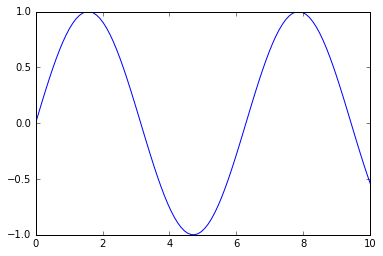

In [105]:
plt.plot(x, y);
plt.show()

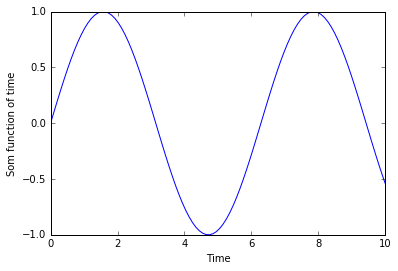

In [106]:
plt.plot(x, y);
plt.xlabel("Time");
plt.ylabel("Som function of time");
plt.show()

### Scatterplot

In [107]:
# Machine learning is all about function approximation
data_1d_path = "./data/data_1d.csv"
A = pd.read_csv(data_1d_path, header=None).as_matrix()

In [108]:
x = A[:,0]
y = A[:,1]

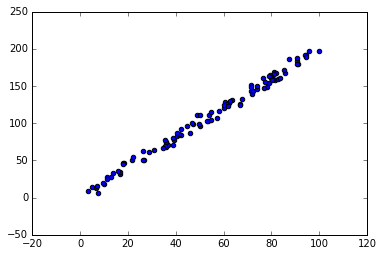

In [109]:
plt.scatter(x,y);

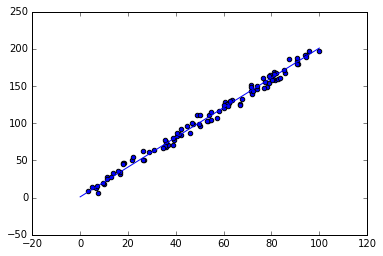

In [110]:
x_line = np.linspace(0, 100, 100)
y_line = 2*x_line + 1
plt.scatter(x, y)
plt.plot(x_line, y_line)
plt.show()

### Histogram

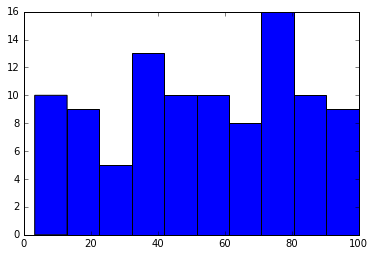

In [111]:
plt.hist(x);

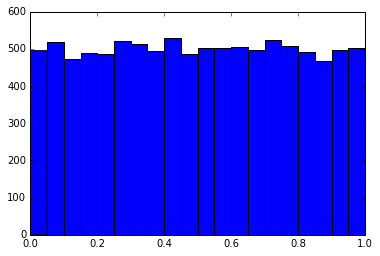

In [112]:
# Random function is uniformly distributed
R = np.random.random(10000)
plt.hist(R, bins=20);

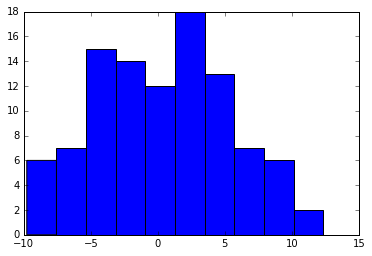

In [113]:
# In linear regression we assume the error is normally distributed, let's check
y_actual = 2*x + 1
residuals = y - y_actual
plt.hist(residuals);

## Plotting Images
- An image is just a matrix of numbers
- A(i,j) represents the pixel intensity at coordinate (i,j)
- JPG or PNG are not matrices because they are compressed
- Decompress them to get back a matrix
- We'll be looking at the MNIST dataset (handwritten digits)
- https://kaggle.com/c/digit-recognizer

In [114]:
mnist_path = "./data/train.csv"
# First column is labels, others are vector of pixel intensities
df = pd.read_csv(mnist_path)

In [115]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
M = df.as_matrix()
im = M[0, 1:]

In [117]:
im.shape

(784,)

In [118]:
im = im.reshape(28, 28)
im.shape

(28, 28)

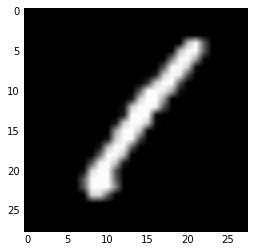

In [119]:
plt.imshow(im, cmap='gray');

In [120]:
M[0,0]

1

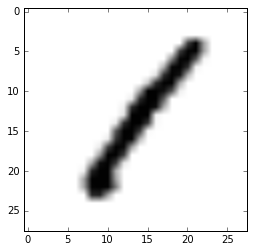

In [121]:
plt.imshow(255 - im, cmap='gray');
# inverts the intensities

# Starting Scipy Stuff
## Gaussian PDF and CDF

- This course is only showing the most common stuff, you can always look up other stuff later
- PDF is probability distribution function
- Given a sample of a random variable, what is its probability density (shown by PDF)
- Scipy gives us a better way to calculate the PDF, it will be much faster

In [122]:
from scipy.stats import norm

norm.pdf(0)

0.3989422804014327

In [123]:
norm.pdf(0, loc=5, scale=10)

0.035206532676429952

In [124]:
# Element-wise is built in!
r = np.random.randn(10)
norm.pdf(r)

array([ 0.29681863,  0.39481037,  0.37301983,  0.39733624,  0.37319262,
        0.39891521,  0.19028804,  0.39186879,  0.30711964,  0.01840664])

In [125]:
# Commonly need the log of the pdf, since it's cheaper than evaluating exponential
norm.logpdf(r)

array([-1.21463398, -0.9293497 , -0.98612371, -0.92297241, -0.98566059,
       -0.91900638, -1.65921634, -0.93682822, -1.18051791, -3.99504375])

In [126]:
# CDF is integral of PDF from - to + inf
norm.pdf(r)

array([ 0.29681863,  0.39481037,  0.37301983,  0.39733624,  0.37319262,
        0.39891521,  0.19028804,  0.39186879,  0.30711964,  0.01840664])

In [127]:
norm.logpdf(r)

array([-1.21463398, -0.9293497 , -0.98612371, -0.92297241, -0.98566059,
       -0.91900638, -1.65921634, -0.93682822, -1.18051791, -3.99504375])

### Sampling from a gaussian distribution

In [128]:
r = np.random.randn(10000)

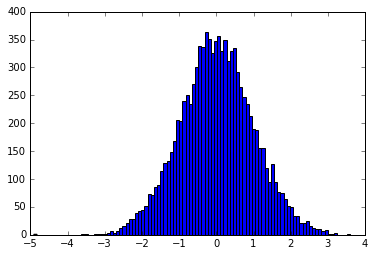

In [129]:
plt.hist(r, bins = 100);

In [130]:
r = 10*np.random.randn(10000) + 5
# givens us samples from a gaussian with standard deviation of 10 and a mean of 5

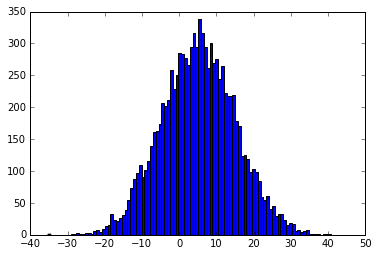

In [131]:
plt.hist(r, bins=100);

### Sampling from a gaussian distribution 2D (spherical and elliptical)

In [132]:
# Just need to add more dimensions
r = np.random.randn(10000, 2)

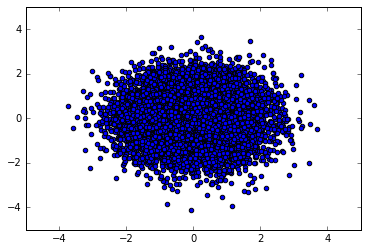

In [133]:
plt.scatter(r[:,0], r[:, 1]);

In [134]:
# Standard deviation of the second dimension 5, mean 2
r[:,1] = 5*r[:,1] + 2

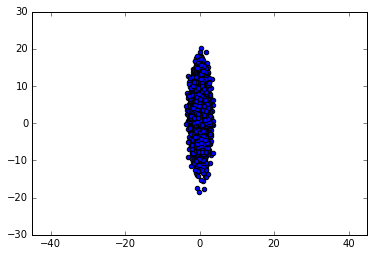

In [135]:
plt.scatter(r[:,0], r[:,1]);
plt.axis('equal');

### Sampling from a general multivariate normal

In [136]:
cov = np.array([[1, 0.8], [0.8, 3]])
from scipy.stats import multivariate_normal as mvn #multivariate normal
mu = np.array([0,2])


In [137]:
r = mvn.rvs(mean=mu, cov=cov, size=1000) 
# rvs samples from the multivariate normal
r

array([[ 1.46183495,  4.8302171 ],
       [ 0.36597921,  3.2109869 ],
       [ 0.28353131,  4.37859505],
       ..., 
       [ 0.73203999, -0.93021604],
       [ 1.06238129,  1.22578631],
       [ 0.8236986 ,  3.87650274]])

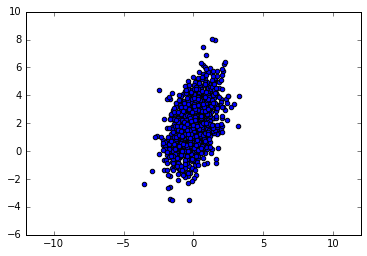

In [138]:
plt.scatter(r[:,0], r[:,1]);
plt.axis('equal');

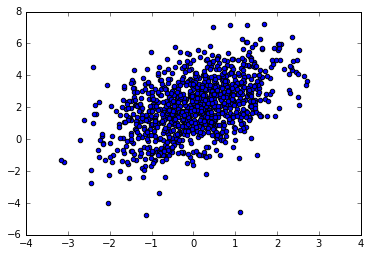

In [139]:
r = np.random.multivariate_normal(mean=mu, cov=cov, size=1000)
plt.scatter(r[:,0], r[:,1]);

## Other interesting scipy functions!!
- Not going to look at many of these in code, also don't use these very often
- This is to know they exist

#### scipy.io.loadmat
- Load MATLAB file (.mat)

#### .wav file loading!
- Audio file at 44.1kHz means for every second of sound you have 44100 integers!!
- Read: scipy.io.wavfile.read
- Write: scipy.io.wavfile.write

#### scipy.signal.convolve
- For images that are 2d and in black and white, can use convolve2d
- This is used in convolutional neural nets

#### FFT is in scipy but not numpy!
- converts signals from the time domain to the frequency domain

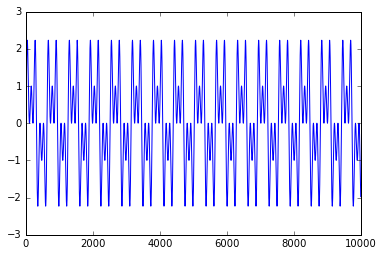

In [140]:
# Let's create a sample with multiple frequencies
x = np.linspace(0, 100, 10000)
y = np.sin(x) + np.sin(3*x) + np.sin(5*x)
plt.plot(y);

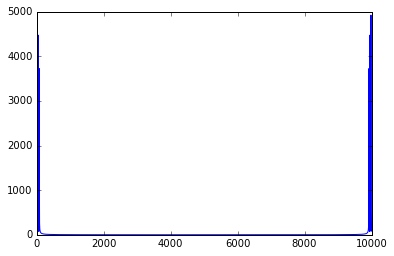

In [141]:
Y = np.fft.fft(y)
# Gives a signal with complex numbers, so we need to find the magnitude before plotting
plt.plot(np.abs(Y)); # this is the fourier transform

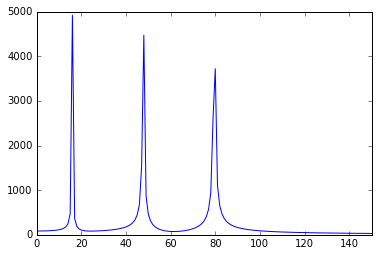

In [142]:
#zooming in, we can see the spikes
plt.plot(np.abs(Y)); # this is the fourier transform
plt.xlim(0,150);

In [143]:
# Calculate what frequencies these represent
2*np.pi*16/100

1.0053096491487339

In [144]:
2*np.pi*48/100

3.015928947446201

In [145]:
2*np.pi*80/100

5.026548245743669